In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn import feature_selection, feature_extraction, manifold, decomposition, cluster
from sklearn import linear_model, svm, neural_network, model_selection, preprocessing, tree, ensemble
from sklearn import gaussian_process, pipeline, metrics, dummy, ensemble, naive_bayes, neighbors

from scipy.cluster import hierarchy
from scipy.spatial import distance

import eli5
import xgboost
import skopt
import seaborn as sns

from skrebate import ReliefF
from skopt.space import Integer, Real, Categorical

from xgboost import XGBClassifier

In [3]:
train = pd.read_csv("data/data_set_ALL_AML_train.csv", delimiter=",")
test = pd.read_csv("data/data_set_ALL_AML_independent.csv", delimiter=",")
actual = pd.read_csv("data/actual.csv")

In [14]:
X_train = (train.drop(["Gene Description", "Gene Accession Number"], axis=1)
                .drop([col for col in train.columns if "call" in col], axis=1)).values.T.astype(np.float32)

X_test = (test.drop(["Gene Description", "Gene Accession Number"], axis=1)
               .drop([col for col in test.columns if "call" in col], axis=1)).values.T.astype(np.float32)

X = np.vstack([X_train, X_test])

labels = actual.cancer.values
y = preprocessing.LabelEncoder().fit_transform(labels)

descriptions = np.array(list(map(lambda x: x[:13], train["Gene Description"])))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True)

def threshold(x):
    xx = x.copy()
    c = 5
    xx[xx > c] = c
    xx[xx < -c] = -c
    
    return xx

pipe = pipeline.make_pipeline(
    preprocessing.RobustScaler(quantile_range=[1,99]),
    preprocessing.StandardScaler(),
    preprocessing.FunctionTransformer(threshold)
)

X = pipe.fit_transform(X)

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

# test_idx = np.argsort(y_test)
# X_test = X_test[test_idx, :]
# y_test = y_test[test_idx]



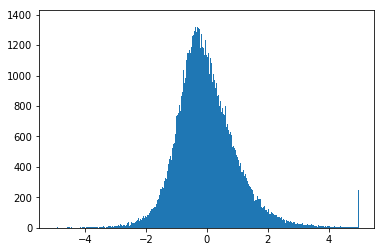

In [5]:
plt.hist(X_test.reshape(-1), bins=500);

In [6]:
def plot(idx, train=True, xticks=False, showmask=False, use_cmap="magma"):
    if train:
        features = X
        labels = y
    else:
        features = X_test
        labels = y_test
    
    plt.figure(figsize=(12,5))
    
    if xticks:
        plt.xticks(range(len(idx)), descriptions[idx], rotation="vertical")
        
    plt.yticks(range(len(features)), labels)
    plt.imshow(features[:,idx], cmap=use_cmap)

# FUJ

In [7]:
pca = decomposition.PCA(n_components=5)
X_embed = pca.fit_transform(X)
X_test_embed = pca.transform(X_test)

In [ ]:
svm.SVC(kernel="linear").fit(X_embed, y).score(X_test_embed, y_test)

In [ ]:
gaussian_process.GaussianProcessClassifier().fit(X_embed, y).score(X_test_embed, y_test)

In [ ]:
metrics.confusion_matrix(y_test, svm.SVC(kernel="linear").fit(X_embed, y).predict(X_test_embed))

In [ ]:
pca.explained_variance_ratio_.cumsum()

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [ ]:
num = 100

kbest = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_classif, k=num)
X_sel = kbest.fit_transform(X, y)
X_test_sel = kbest.transform(X_test)
X_sel.shape

plot(kbest.get_support(True))
plot(kbest.get_support(True), train=False)

In [ ]:
svm.SVC().fit(X_sel, y).score(X_test_sel, y_test)

# Feature selection using RFE

In [15]:
rfe = feature_selection.RFE(svm.LinearSVC(), 64, step=4, verbose=1)
%time rfe.fit(X_train, y_train)

Fitting estimator with 7129 features.
Fitting estimator with 7125 features.
Fitting estimator with 7121 features.
Fitting estimator with 7117 features.
Fitting estimator with 7113 features.
Fitting estimator with 7109 features.
Fitting estimator with 7105 features.
Fitting estimator with 7101 features.
Fitting estimator with 7097 features.
Fitting estimator with 7093 features.
Fitting estimator with 7089 features.
Fitting estimator with 7085 features.
Fitting estimator with 7081 features.
Fitting estimator with 7077 features.
Fitting estimator with 7073 features.
Fitting estimator with 7069 features.
Fitting estimator with 7065 features.
Fitting estimator with 7061 features.
Fitting estimator with 7057 features.
Fitting estimator with 7053 features.
Fitting estimator with 7049 features.
Fitting estimator with 7045 features.
Fitting estimator with 7041 features.
Fitting estimator with 7037 features.
Fitting estimator with 7033 features.
Fitting estimator with 7029 features.
Fitting esti

Fitting estimator with 6237 features.
Fitting estimator with 6233 features.
Fitting estimator with 6229 features.
Fitting estimator with 6225 features.
Fitting estimator with 6221 features.
Fitting estimator with 6217 features.
Fitting estimator with 6213 features.
Fitting estimator with 6209 features.
Fitting estimator with 6205 features.
Fitting estimator with 6201 features.
Fitting estimator with 6197 features.
Fitting estimator with 6193 features.
Fitting estimator with 6189 features.
Fitting estimator with 6185 features.
Fitting estimator with 6181 features.
Fitting estimator with 6177 features.
Fitting estimator with 6173 features.
Fitting estimator with 6169 features.
Fitting estimator with 6165 features.
Fitting estimator with 6161 features.
Fitting estimator with 6157 features.
Fitting estimator with 6153 features.
Fitting estimator with 6149 features.
Fitting estimator with 6145 features.
Fitting estimator with 6141 features.
Fitting estimator with 6137 features.
Fitting esti

Fitting estimator with 5345 features.
Fitting estimator with 5341 features.
Fitting estimator with 5337 features.
Fitting estimator with 5333 features.
Fitting estimator with 5329 features.
Fitting estimator with 5325 features.
Fitting estimator with 5321 features.
Fitting estimator with 5317 features.
Fitting estimator with 5313 features.
Fitting estimator with 5309 features.
Fitting estimator with 5305 features.
Fitting estimator with 5301 features.
Fitting estimator with 5297 features.
Fitting estimator with 5293 features.
Fitting estimator with 5289 features.
Fitting estimator with 5285 features.
Fitting estimator with 5281 features.
Fitting estimator with 5277 features.
Fitting estimator with 5273 features.
Fitting estimator with 5269 features.
Fitting estimator with 5265 features.
Fitting estimator with 5261 features.
Fitting estimator with 5257 features.
Fitting estimator with 5253 features.
Fitting estimator with 5249 features.
Fitting estimator with 5245 features.
Fitting esti

Fitting estimator with 4461 features.
Fitting estimator with 4457 features.
Fitting estimator with 4453 features.
Fitting estimator with 4449 features.
Fitting estimator with 4445 features.
Fitting estimator with 4441 features.
Fitting estimator with 4437 features.
Fitting estimator with 4433 features.
Fitting estimator with 4429 features.
Fitting estimator with 4425 features.
Fitting estimator with 4421 features.
Fitting estimator with 4417 features.
Fitting estimator with 4413 features.
Fitting estimator with 4409 features.
Fitting estimator with 4405 features.
Fitting estimator with 4401 features.
Fitting estimator with 4397 features.
Fitting estimator with 4393 features.
Fitting estimator with 4389 features.
Fitting estimator with 4385 features.
Fitting estimator with 4381 features.
Fitting estimator with 4377 features.
Fitting estimator with 4373 features.
Fitting estimator with 4369 features.
Fitting estimator with 4365 features.
Fitting estimator with 4361 features.
Fitting esti

Fitting estimator with 3577 features.
Fitting estimator with 3573 features.
Fitting estimator with 3569 features.
Fitting estimator with 3565 features.
Fitting estimator with 3561 features.
Fitting estimator with 3557 features.
Fitting estimator with 3553 features.
Fitting estimator with 3549 features.
Fitting estimator with 3545 features.
Fitting estimator with 3541 features.
Fitting estimator with 3537 features.
Fitting estimator with 3533 features.
Fitting estimator with 3529 features.
Fitting estimator with 3525 features.
Fitting estimator with 3521 features.
Fitting estimator with 3517 features.
Fitting estimator with 3513 features.
Fitting estimator with 3509 features.
Fitting estimator with 3505 features.
Fitting estimator with 3501 features.
Fitting estimator with 3497 features.
Fitting estimator with 3493 features.
Fitting estimator with 3489 features.
Fitting estimator with 3485 features.
Fitting estimator with 3481 features.
Fitting estimator with 3477 features.
Fitting esti

Fitting estimator with 2609 features.
Fitting estimator with 2605 features.
Fitting estimator with 2601 features.
Fitting estimator with 2597 features.
Fitting estimator with 2593 features.
Fitting estimator with 2589 features.
Fitting estimator with 2585 features.
Fitting estimator with 2581 features.
Fitting estimator with 2577 features.
Fitting estimator with 2573 features.
Fitting estimator with 2569 features.
Fitting estimator with 2565 features.
Fitting estimator with 2561 features.
Fitting estimator with 2557 features.
Fitting estimator with 2553 features.
Fitting estimator with 2549 features.
Fitting estimator with 2545 features.
Fitting estimator with 2541 features.
Fitting estimator with 2537 features.
Fitting estimator with 2533 features.
Fitting estimator with 2529 features.
Fitting estimator with 2525 features.
Fitting estimator with 2521 features.
Fitting estimator with 2517 features.
Fitting estimator with 2513 features.
Fitting estimator with 2509 features.
Fitting esti

Fitting estimator with 1617 features.
Fitting estimator with 1613 features.
Fitting estimator with 1609 features.
Fitting estimator with 1605 features.
Fitting estimator with 1601 features.
Fitting estimator with 1597 features.
Fitting estimator with 1593 features.
Fitting estimator with 1589 features.
Fitting estimator with 1585 features.
Fitting estimator with 1581 features.
Fitting estimator with 1577 features.
Fitting estimator with 1573 features.
Fitting estimator with 1569 features.
Fitting estimator with 1565 features.
Fitting estimator with 1561 features.
Fitting estimator with 1557 features.
Fitting estimator with 1553 features.
Fitting estimator with 1549 features.
Fitting estimator with 1545 features.
Fitting estimator with 1541 features.
Fitting estimator with 1537 features.
Fitting estimator with 1533 features.
Fitting estimator with 1529 features.
Fitting estimator with 1525 features.
Fitting estimator with 1521 features.
Fitting estimator with 1517 features.
Fitting esti

Fitting estimator with 633 features.
Fitting estimator with 629 features.
Fitting estimator with 625 features.
Fitting estimator with 621 features.
Fitting estimator with 617 features.
Fitting estimator with 613 features.
Fitting estimator with 609 features.
Fitting estimator with 605 features.
Fitting estimator with 601 features.
Fitting estimator with 597 features.
Fitting estimator with 593 features.
Fitting estimator with 589 features.
Fitting estimator with 585 features.
Fitting estimator with 581 features.
Fitting estimator with 577 features.
Fitting estimator with 573 features.
Fitting estimator with 569 features.
Fitting estimator with 565 features.
Fitting estimator with 561 features.
Fitting estimator with 557 features.
Fitting estimator with 553 features.
Fitting estimator with 549 features.
Fitting estimator with 545 features.
Fitting estimator with 541 features.
Fitting estimator with 537 features.
Fitting estimator with 533 features.
Fitting estimator with 529 features.
F

RFE(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
  n_features_to_select=64, step=4, verbose=1)

In [16]:
X = rfe.transform(X)

In [20]:
pipe = pipeline.Pipeline([("model", linear_model.LogisticRegression())])

search_logreg = {
    "model": [linear_model.LogisticRegression(dual=True, solver="liblinear")],
    "model__C": Real(0.1, 100, "log_uniform")
}

search_svm_rbf = {
    "model": [svm.SVC(kernel="rbf")],
    "model__C": Real(0.1, 100, "log_uniform"),
    "model__gamma": Real(0.1, 100, "log_uniform")
}

search_svm_linear = {
    "model": [svm.LinearSVC()],
    "model__C": Real(0.1, 100, "log_uniform"),    
}

search_svm_poly = {
    "model": [svm.SVC(kernel="poly")],
    "model__C": Real(0.1, 100, "log_uniform"),
    "model__degree": Integer(1, 10),
    "model__gamma": Real(1e-6, 1e3, "log_uniform")
}

search_svm_rbf = {
    "model": [svm.SVC(kernel="rbf")],
    "model__C": Real(0.1, 100, "log_uniform"),
    "model__gamma": Real(1e-6, 1e3, "log_uniform")
}

search_forest = {
    "model": [ensemble.RandomForestClassifier()],
    "model__n_estimators": Integer(5, 500),
    "model__max_depth": Integer(2, 5),
    "model__min_samples_split": Integer(2, 10),
    "model__min_samples_leaf": Integer(1, 10)
}

search_adaboost = {
    "model": [ensemble.AdaBoostClassifier()],
    "model__n_estimators": Integer(5, 500)
}

search_nb = {
    "model": [naive_bayes.BernoulliNB()],
    "model__alpha": Integer(1, 10)
}

search_knn = {
    "model": [neighbors.KNeighborsClassifier()],
    "model__n_neighbors": Integer(1, 20)
}

opt = skopt.BayesSearchCV(pipe, [
    (search_logreg, 20),
    (search_svm_linear, 20),
    (search_svm_poly, 20),
    (search_svm_rbf, 20),
    (search_forest, 20),
    (search_adaboost, 8),
    (search_nb, 8),
    (search_knn, 10)
], n_jobs=10, verbose=0)

opt.fit(X, y)
opt.best_score_

0.8055555555555556

In [21]:
model_selection.cross_val_score(opt.best_estimator_, X, y, cv=10).mean()

0.8363095238095237

In [22]:
opt.best_estimator_

Pipeline(memory=None,
     steps=[('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

# TODO:

- search hyperparametru a algoritmu, vyzouset vsechno mozny
- zkusit tpot
- clusterovani + dendrogram
- najit subset genu, ktery porad umi klasifikovat (search nad ruznyma podmnozinama)
- vizualizace confusion matice
- ROC/AUC
- vizualizace clusteru

# Genetic Programming with TPOT

[TPOT](https://github.com/EpistasisLab/tpot) uses genetic programming to automatically create a ML pipeline.

In [23]:
import tpot

In [31]:
pot = tpot.TPOTClassifier(generations=20, population_size=5, verbosity=2, n_jobs=10)
pot.fit(X, y)

30 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 83


Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False


_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 81


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=20, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=10,
        offspring_size=5, periodic_checkpoint_folder=None,
        population_size=5, random_state=None, scoring=None, subsample=1.0,
        verbosity=21, warm_start=False)

In [32]:
pot.export("best_tpot.py")

True

In [33]:
!type "best_tpot.py"

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.9285714285714286
exported_pipeline = BernoulliNB(alpha=10.0, fit_prior=False)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [36]:
model_selection.cross_val_score(naive_bayes.BernoulliNB(alpha=10.0, fit_prior=False), X, y, cv=10).mean()

0.9154761904761906

Using ExtraTrees feature importance classifier

In [ ]:
cls = ensemble.ExtraTreesClassifier(n_estimators=500)
cls.fit(X_embed, y)

important = np.argsort(cls.feature_importances_)[-100:]
plot(important)
plot(important, train=False)

print(cls.score(pca.transform(X_test), y_test))

In [ ]:
opt = skopt.BayesSearchCV(svm.SVC(),
                   {
                       "C": Real(1e-6, 1e6, prior="log_uniform"),
                       "gamma": Real(1e-6, 1e6, prior="log_uniform"),
                       "degree": Integer(1, 8),
                       "kernel": Categorical(["linear", "poly", "rbf"])
                   }, n_jobs=10)

opt.fit(X, y)

In [ ]:
opt.best_params_

In [ ]:
metrics.confusion_matrix(y, opt.best_estimator_.predict(X))

In [ ]:
pipe = pipeline.Pipeline([
#     ("selection", feature_selection.SelectKBest()),
    ("model", svm.SVC())
])

linear_svm_search = {
#     "selection__k": Integer(20, X.shape[0]),
    "model": [svm.LinearSVC()]
}

svc_search = {
#     "selection__k": Integer(20, X.shape[0]),
    "model": [svm.SVC()],
    "model__C": Real(1e-6, 1e6, prior="log_uniform"),
    "model__gamma": Real(1e-6, 1e6, prior="log_uniform"),
    "model__degree": Integer(1, 8),
    "model__kernel": Categorical(["linear", "poly", "rbf"])
}

opt = skopt.BayesSearchCV(pipe, [(linear_svm_search, 10), (svc_search, 100)], n_jobs=8)

opt.fit(X_embed, y).score(X_embed_test, y_test)

In [ ]:
clf = pipeline.make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100, n_jobs=8, verbose=2),
                         ensemble.RandomForestClassifier(n_estimators=100))

print(np.mean(model_selection.cross_val_score(clf, X, y)))

In [ ]:
rel = ReliefF(n_features_to_select=2, n_neighbors=100, n_jobs=8, verbose=2).fit(X, y)

In [ ]:
X_rel = rel.transform(X)
# X_test_rel = rel.transform(X_test)

In [ ]:
params = {
    "n_estimators": Integer(1, 1000),
    "min_samples_leaf": Integer(2, 10),
    "min_samples_split": Integer(2, 10)    
}

opt = skopt.BayesSearchCV(
    ensemble.RandomForestClassifier(),
    params
)

opt.fit(X_rel, y)

In [ ]:
opt.best_params_

In [ ]:
forest.fit(X_rel, y).score(X_test_rel, y_test)

In [ ]:
model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators=500),
                                      X_rel, y, cv=model_selection.LeaveOneOut(), n_jobs=8).mean()

In [ ]:
forest.fit(X_rel, y).score(X_test_rel, y_test)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("discretization")
library("discretization")

In [ ]:
rfe = feature_selection.RFE(svm.LinearSVC(), 64, step=3, verbose=1)
%time rfe.fit(X, y)

In [ ]:
X_rfe = rfe.transform(X)
X_test_rfe = rfe.transform(X_test)

In [ ]:
plt.imshow(X_rfe)

In [ ]:
plt.imshow(X_test_rfe)

In [ ]:
svm.SVC(kernel="poly").fit(X_rfe, y).score(X_test_rfe, y_test)

In [ ]:
ensemble.ExtraTreesClassifier(n_estimators=10, min_samples_leaf=3, min_samples_split=3).fit(X_rfe, y).score(X_test_rfe, y_test)

In [ ]:
z_dim = 100

tf.reset_default_graph()

img = tf.placeholder(tf.float32, shape=[None, input_shape], name="img")

def encoder(img):
    with tf.variable_scope("encoder"):
        hidden = tf.layers.dense(img, 500, activation=tf.nn.relu)
        hidden = tf.layers.dense(hidden, 500, activation=tf.nn.relu)
    
    return hidden

def decoder(z):
    with tf.variable_scope("decoder"):
        hidden = tf.layers.dense(z, 500, activation=tf.nn.relu)
        hidden = tf.layers.dense(hidden, 500, activation=tf.nn.relu)
        
    out = tf.layers.dense(hidden, input_shape, name="output")    
    return out

z = encoder(img)
out = decoder(z)

loss = tf.losses.mean_squared_error(img, out)

global_step = tf.train.create_global_step()
training = tf.train.AdamOptimizer().minimize(loss, global_step=global_step, name="training")

summary_writer = tf.contrib.summary.create_file_writer("logs", flush_millis=5*1000)

with summary_writer.as_default(), tf.contrib.summary.record_summaries_every_n_global_steps(100):
    summaries = [
        tf.contrib.summary.scalar("loss", loss)
    ]
    
try:
    sess.close()
except NameError:
    print("No session defined, continuing.")

sess = tf.InteractiveSession()

with summary_writer.as_default():
    tf.contrib.summary.initialize(session=sess, graph=tf.get_default_graph())

init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
for _ in range(10000):
    sess.run([training, summaries], feed_dict={img: X})

In [ ]:
X_embed = sess.run(z, feed_dict={img: X})
X_test_embed = sess.run(z, feed_dict={img: X_test})

In [ ]:
svm.LinearSVC().fit(X_embed, y).score(X_test_embed, y_test)

In [ ]:
dummy.DummyClassifier().fit(X_embed, y).score(X_test_embed, y_test)

In [ ]:
linear_model.LogisticRegression(penalty="l1", solver="liblinear", class_weight="balanced", C=.0001).fit(X_rfe, y).score(X_test_rfe, y_test)

In [ ]:
km = cluster.KMeans(3).fit(X_test.T)

In [ ]:
X_vis = decomposition.PCA(2).fit_transform(X_test.T)

In [ ]:
assignments = np.argmax(km.fit_transform(X_test.T), axis=1)

In [ ]:
plt.scatter(X_vis[:,0], X_vis[:,1], c=assignments)

In [ ]:
X[:,assignments == 2].shape

In [ ]:
gene_1 = X[:,assignments == 1]

In [ ]:
pca = decomposition.PCA(100).fit(gene_1)

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [ ]:
c = 1
linear_model.LogisticRegression().fit(X[:,assignments == c], y).score(X_test[:,assignments == c], y_test)

In [ ]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# References

- Golub, Todd R., et al. "Molecular classification of cancer: class discovery and class prediction by gene expression monitoring." science 286.5439 (1999): 531-537.